In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
train = pd.read_csv('houses_price_dataset.csv')
test = pd.read_csv('houses_price_dataset.csv')

In [8]:
test_id = test.index.to_list() 


In [10]:
print(test.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'Unnamed: 12', 'owner_name', 'price'],
      dtype='object')


In [12]:
df = train

In [14]:
df.drop('Id', axis=1, inplace=True, errors='ignore')
test.drop('Id', axis=1, inplace=True, errors='ignore')

In [16]:
train = df

In [18]:
print(f"Number of rows and number of columns in the train dataset are {train.shape[0]} and {train.shape[1]}")
print(f"Number of rows and number of columns in the test dataset are {test.shape[0]} and {test.shape[1]}")

Number of rows and number of columns in the train dataset are 545 and 15
Number of rows and number of columns in the test dataset are 545 and 15


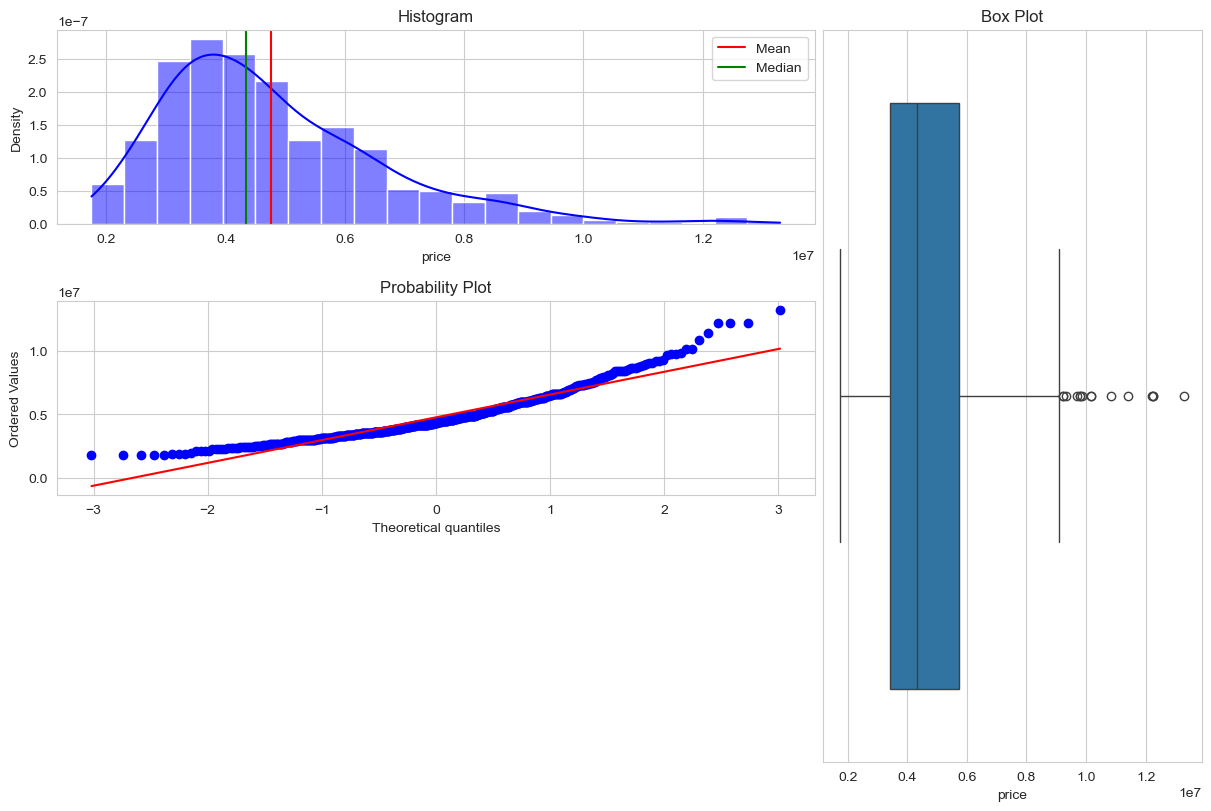

In [20]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.histplot(df[feature], kde=True, ax=ax1, stat='density', color='blue')
    ax1.axvline(x=df[feature].mean(), color='red', label='Mean')
    ax1.axvline(x=df[feature].median(), color='green', label='Median')
    ax1.legend()
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ Plot')
    stats.probplot(df[feature], plot=ax2)
    
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(x=df[feature], orient='v', ax=ax3)
    
    plt.show()

three_chart_plot(df, 'price')

In [22]:
from scipy.stats import skew
print("Skewness of the price is", df['price'].skew())

Skewness of the price is 1.2122388370279802


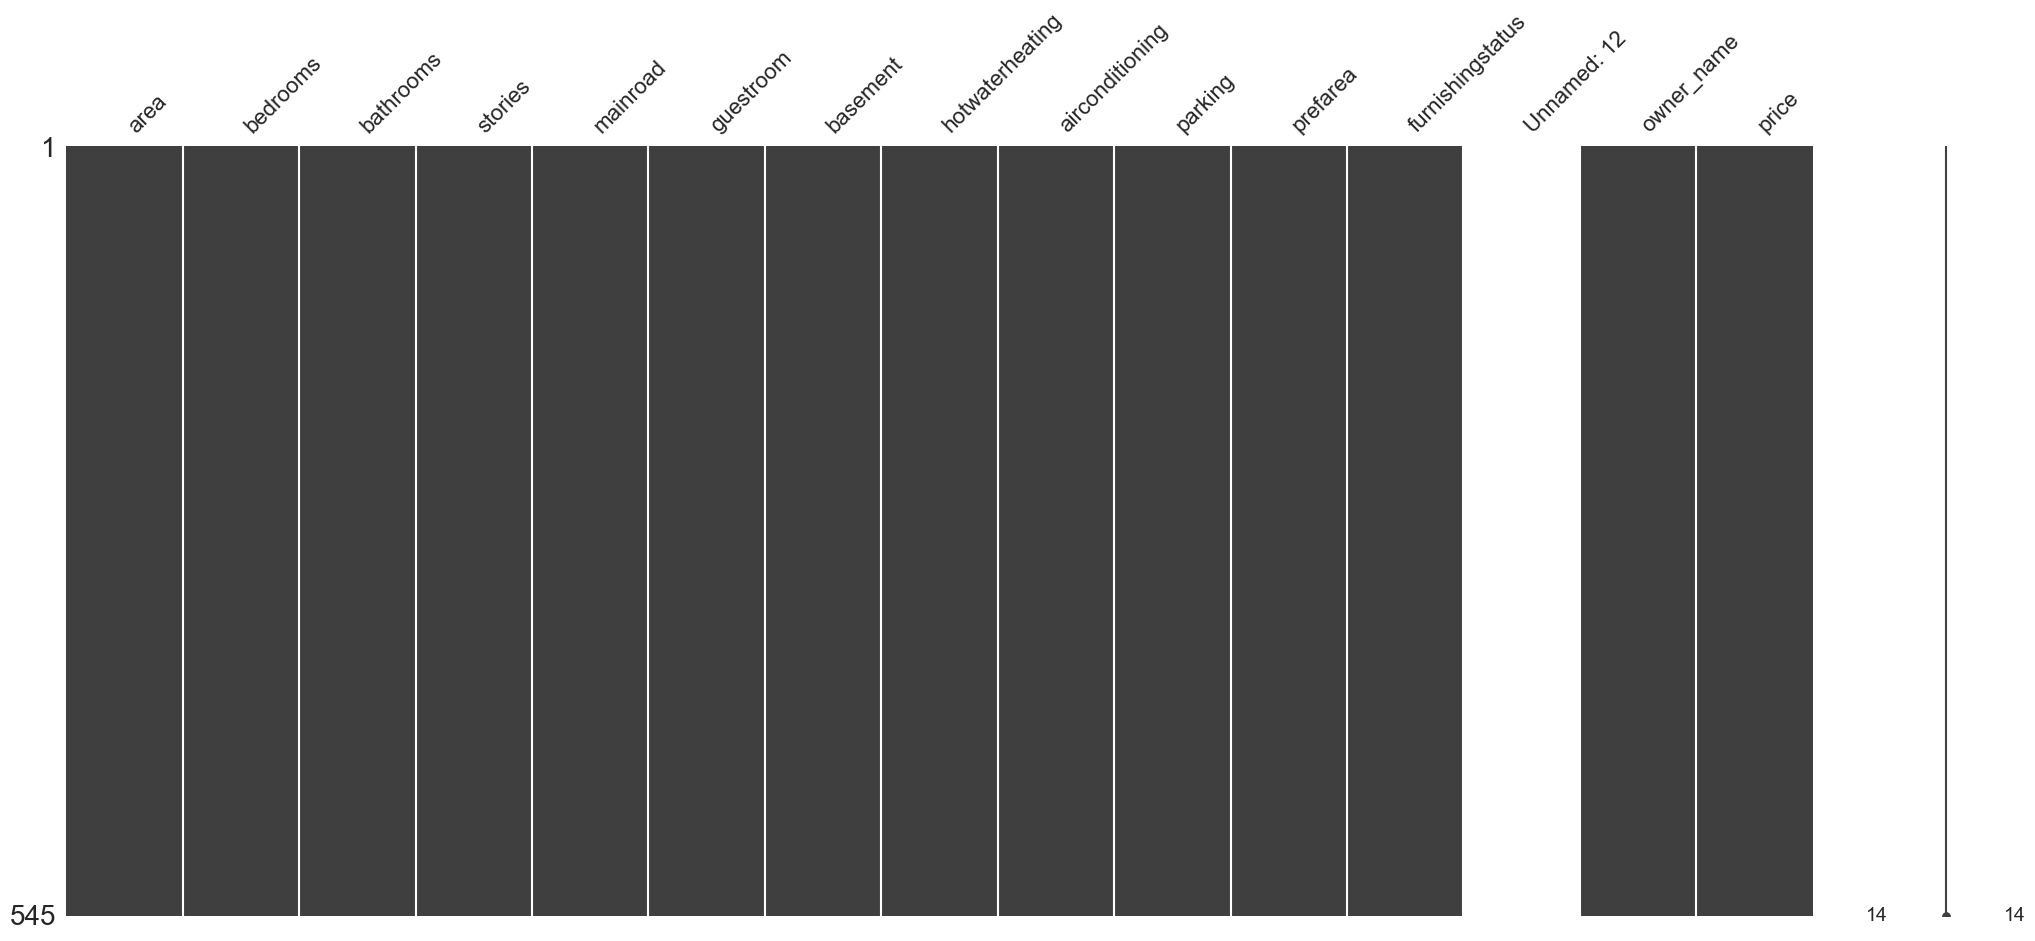

In [24]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(train)
plt.show()


In [28]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [30]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
5,guestroom,0,0.0
6,basement,0,0.0
7,hotwaterheating,0,0.0
8,airconditioning,0,0.0
9,parking,0,0.0
10,prefarea,0,0.0
11,furnishingstatus,0,0.0
13,owner_name,0,0.0
14,price,0,0.0
12,Unnamed: 12,545,100.0


In [32]:
null_frame_test = null_table(test)
null_frame_test.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
5,guestroom,0,0.0
6,basement,0,0.0
7,hotwaterheating,0,0.0
8,airconditioning,0,0.0
9,parking,0,0.0
10,prefarea,0,0.0
11,furnishingstatus,0,0.0
13,owner_name,0,0.0
14,price,0,0.0
12,Unnamed: 12,545,100.0


In [34]:
na = train.shape[0]
nb = test.shape[0]
y_train = train['price'].to_frame()
# Combine train and test sets
total = pd.concat((train, test), sort = False).reset_index(drop = True)
# Drop the target "SalePrice" and Id columns
total.drop(['price'], axis = 1, inplace = True)
print(f"Total size is {total.shape}")

Total size is (1090, 14)


In [36]:
import matplotlib.pyplot as plt

def msv_1(data, thresh=20, color='black', edgecolor='black', height=3, width=15):
    plt.figure(figsize=(width, height))
    
    percentage = data.isnull().mean() * 100
    percentage = percentage.sort_values(ascending=False)
    percentage.plot.bar(color=color, edgecolor=edgecolor)
    
    plt.axhline(y=thresh, color='r', linestyle='-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold')
    
    x_pos = len(percentage) / 1.7  # x position for texts
    
    plt.text(x_pos, thresh + 5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
             ha='left', va='top')
    plt.text(x_pos, thresh - 10, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
             ha='left', va='top')
    
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight='bold')
    
    plt.show()


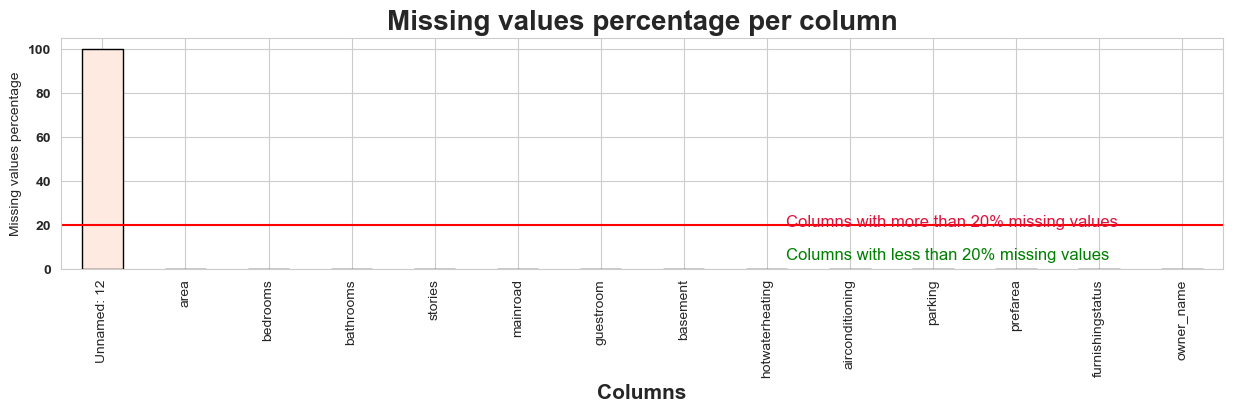

In [38]:
msv_1(total, 20, color=sns.color_palette('Reds',15))

In [40]:
category_var = df.select_dtypes(include = 'object')
num_var = df.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  8
Number of numerical features are:  7


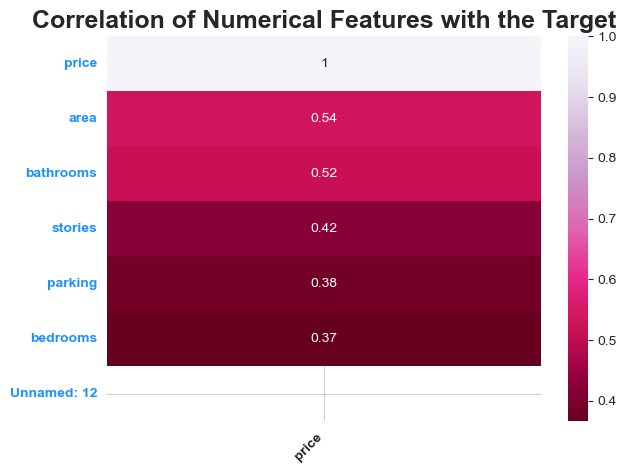

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

num = df.select_dtypes(exclude='object')
corr_num = num.corr()

corr_price = corr_num[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(7, 5))
sns.heatmap(corr_price, annot=True, cmap='PuRd_r', cbar=True)

plt.title('Correlation of Numerical Features with the Target', weight='bold', fontsize=18)
plt.xticks(rotation=45, ha='right', weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()


In [50]:
num_df = df.select_dtypes(include=['number'])  

correlation = num_df.corr()['price'].sort_values(ascending=False).to_frame().head(10)

import seaborn as sns

cmap = sns.light_palette("cyan", as_cmap=True)
s = correlation.style.background_gradient(cmap=cmap)

s


,price
price,1.000000
area,0.535997
bathrooms,0.517545
stories,0.420712
parking,0.384394
bedrooms,0.366494
Unnamed: 12,nan


In [52]:
print(df.columns)


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'Unnamed: 12', 'owner_name', 'price'],
      dtype='object')


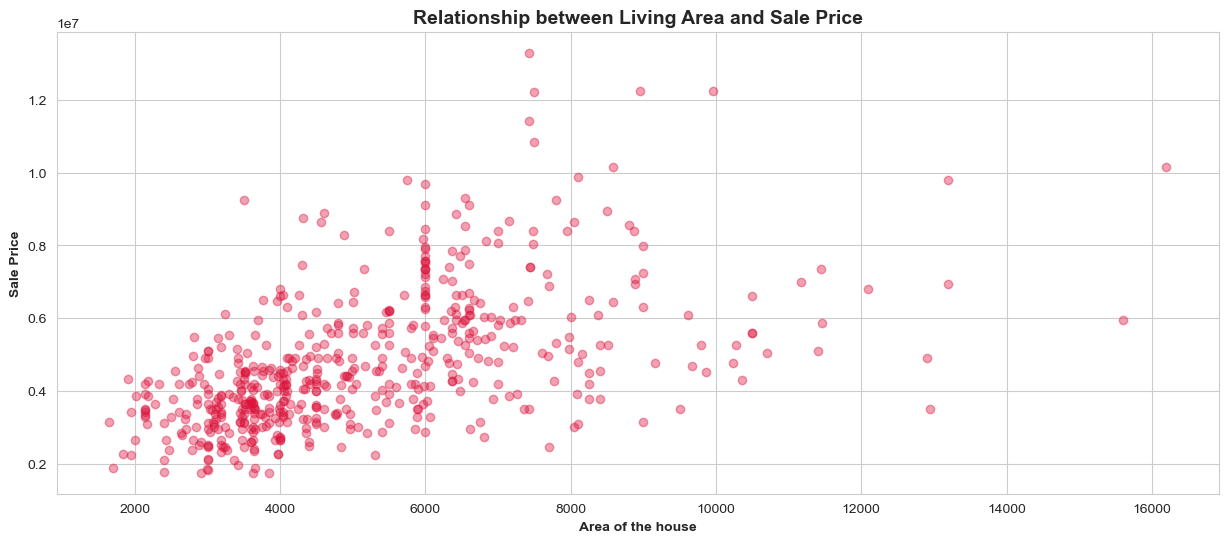

In [54]:
df_clean = df.dropna(subset=['area', 'price'])

plt.figure(figsize=(15, 6))
plt.scatter(x='area', y='price', data=df_clean, color='crimson', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight='bold', fontsize=14)
plt.xlabel('Area of the house', weight='bold')
plt.ylabel('Sale Price', weight='bold')
plt.show()


               area    bedrooms   bathrooms     stories         price
count    545.000000  545.000000  545.000000  545.000000  5.450000e+02
mean    5150.541284    2.965138    1.286239    1.805505  4.766729e+06
std     2170.141023    0.738064    0.502470    0.867492  1.870440e+06
min     1650.000000    1.000000    1.000000    1.000000  1.750000e+06
25%     3600.000000    2.000000    1.000000    1.000000  3.430000e+06
50%     4600.000000    3.000000    1.000000    2.000000  4.340000e+06
75%     6360.000000    3.000000    2.000000    2.000000  5.740000e+06
max    16200.000000    6.000000    4.000000    4.000000  1.330000e+07


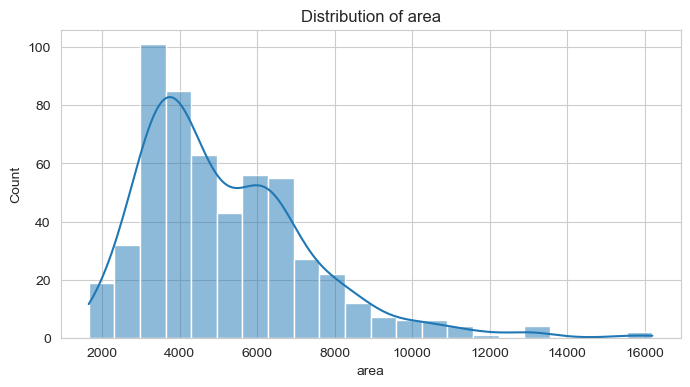

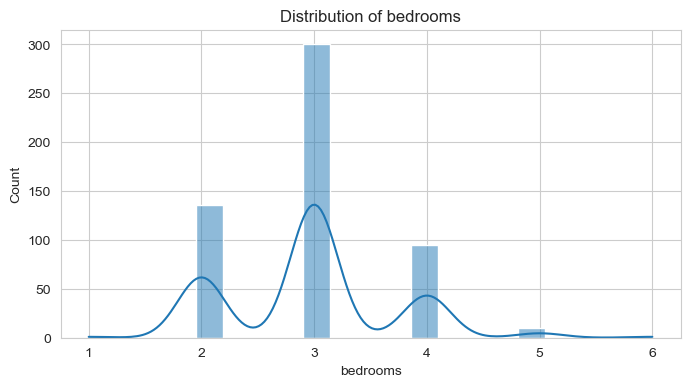

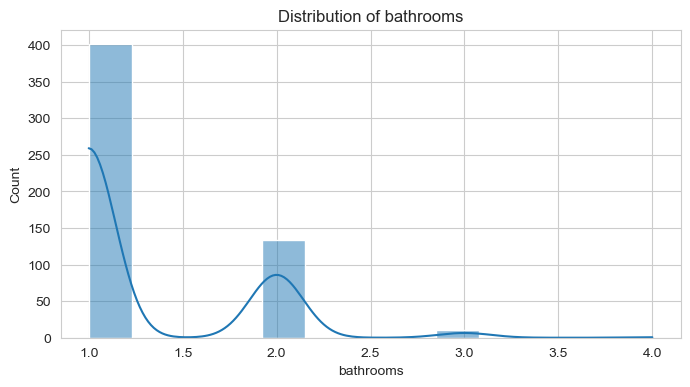

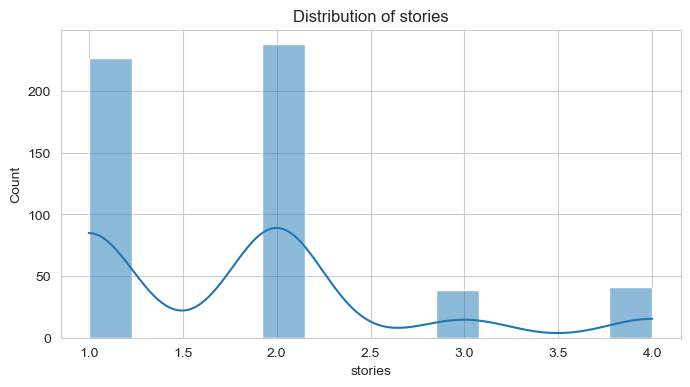

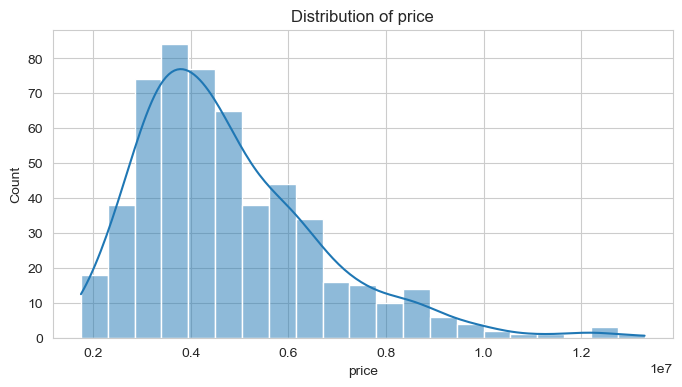

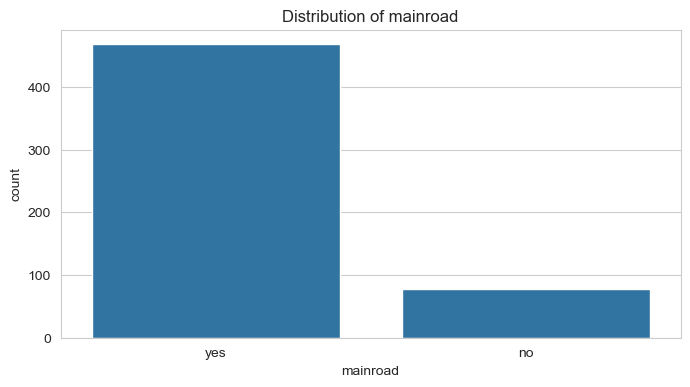

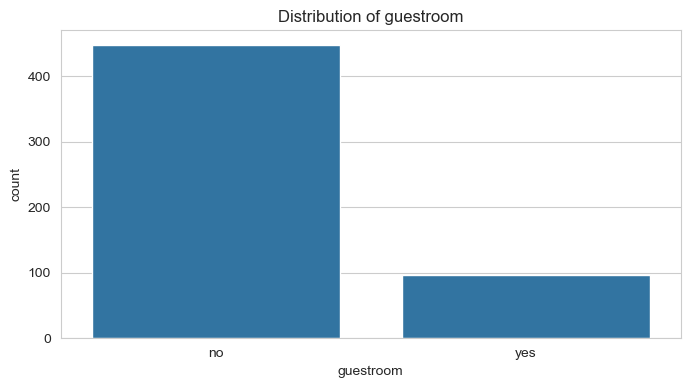

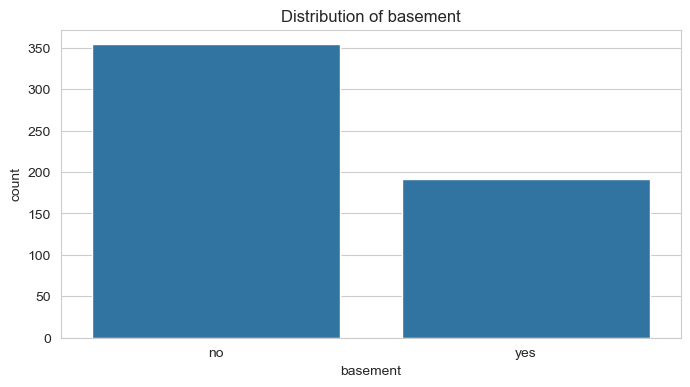

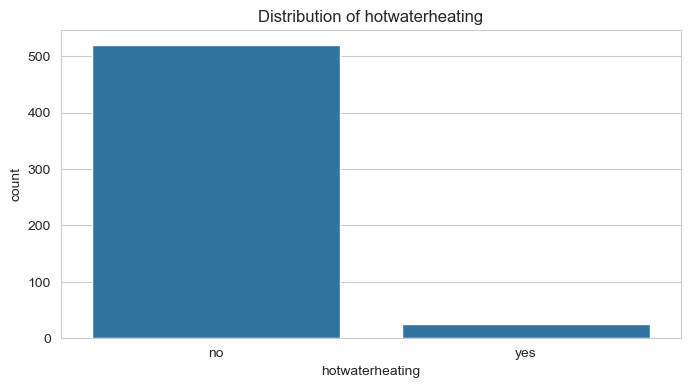

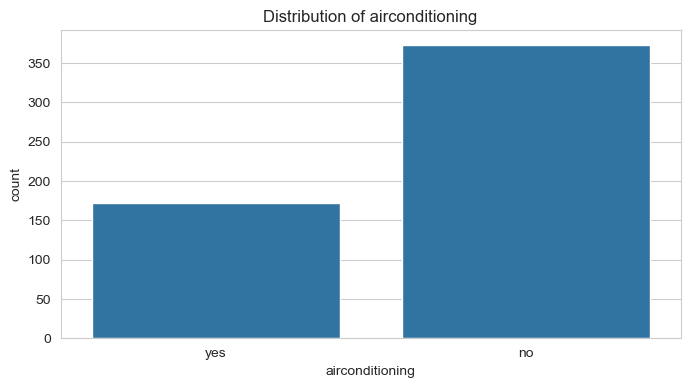

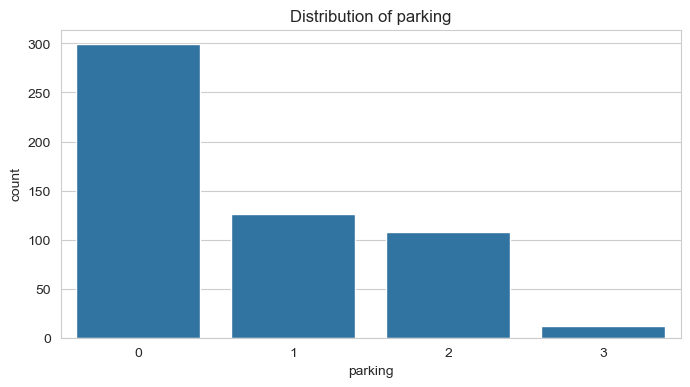

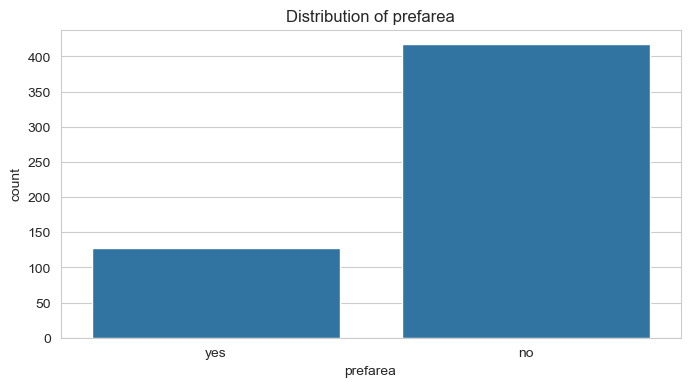

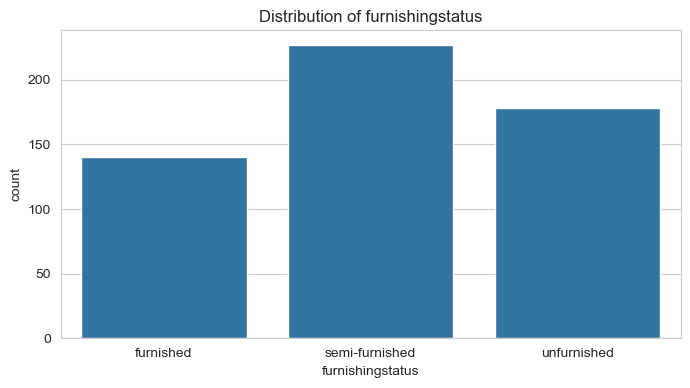

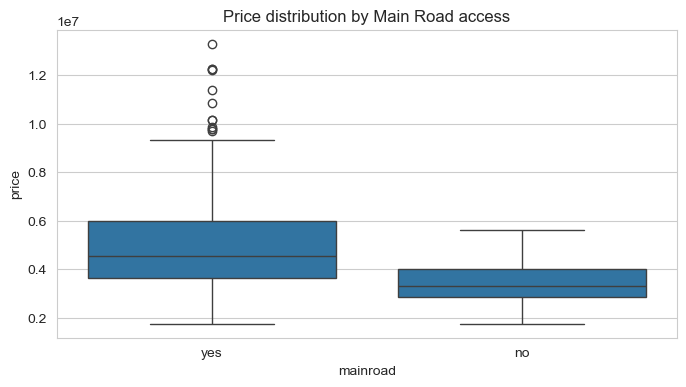

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'price']

# Categorical columns
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# Numerical summary & plots
print(df[num_cols].describe())

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical value counts
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Price vs categorical variable example
plt.figure(figsize=(8,4))
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Price distribution by Main Road access')
plt.show()


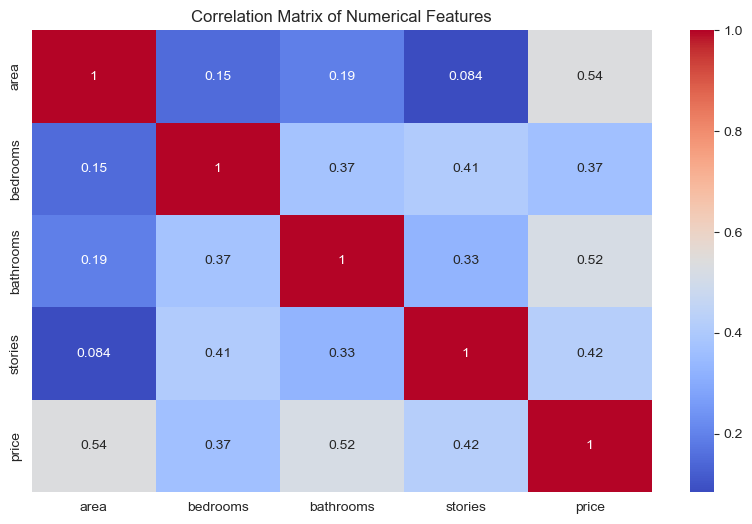

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


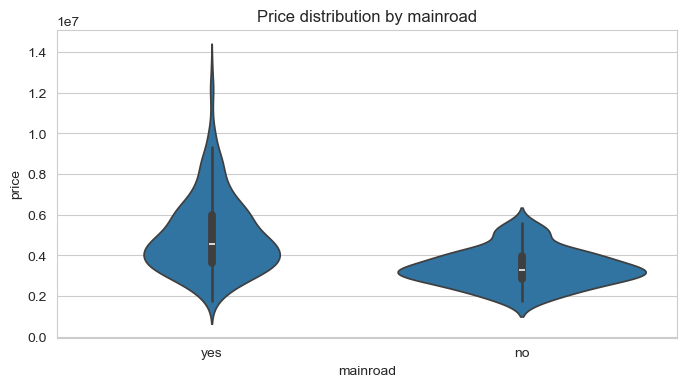

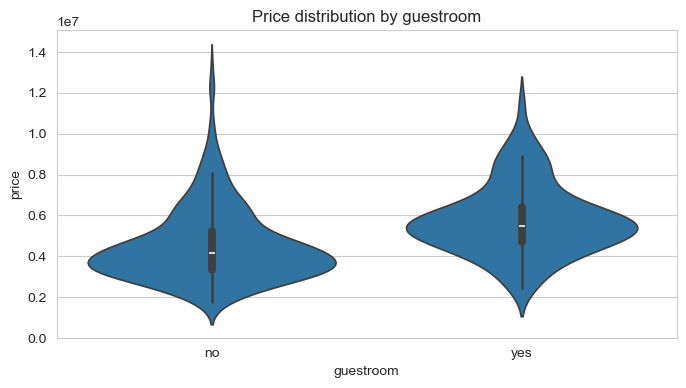

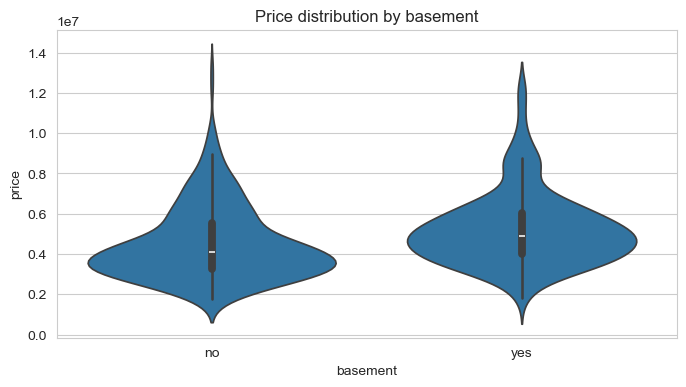

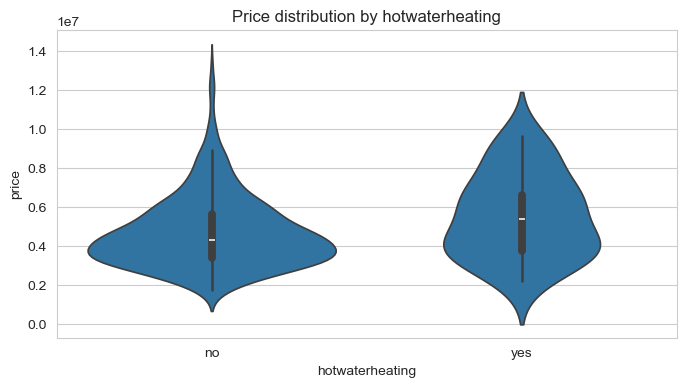

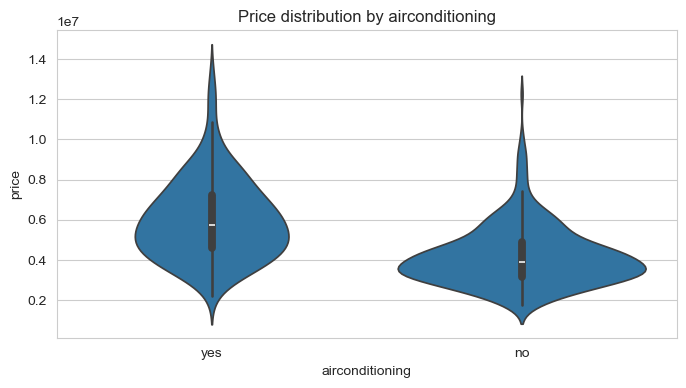

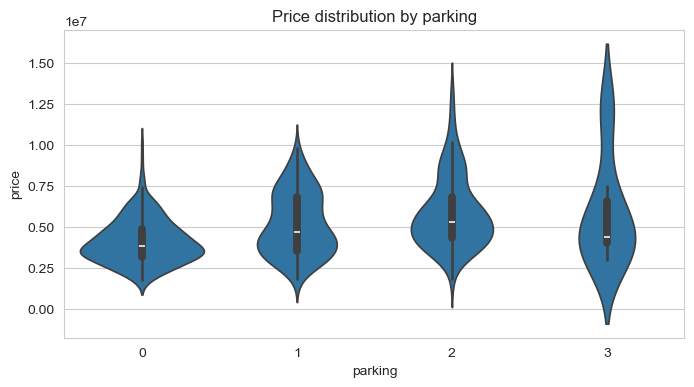

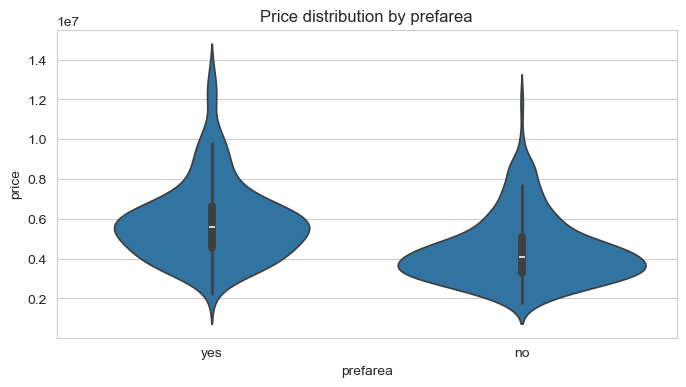

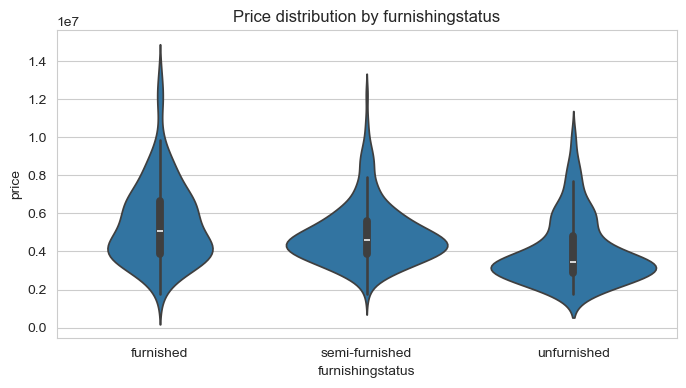

In [60]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.violinplot(x=col, y='price', data=df)
    plt.title(f'Price distribution by {col}')
    plt.show()


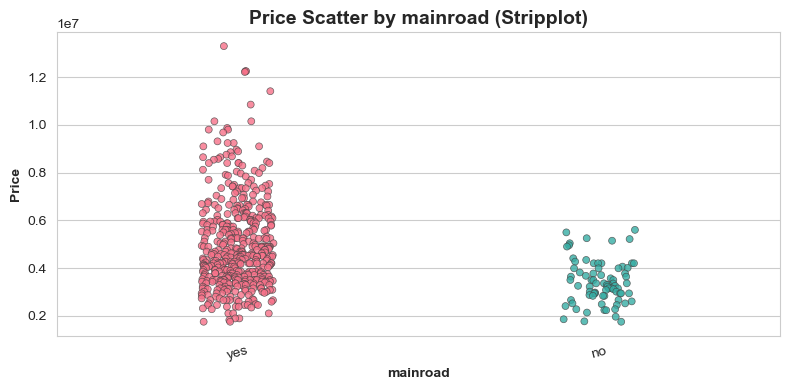

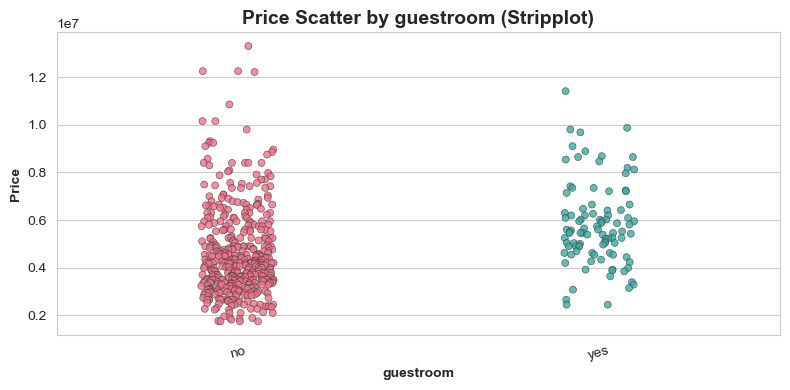

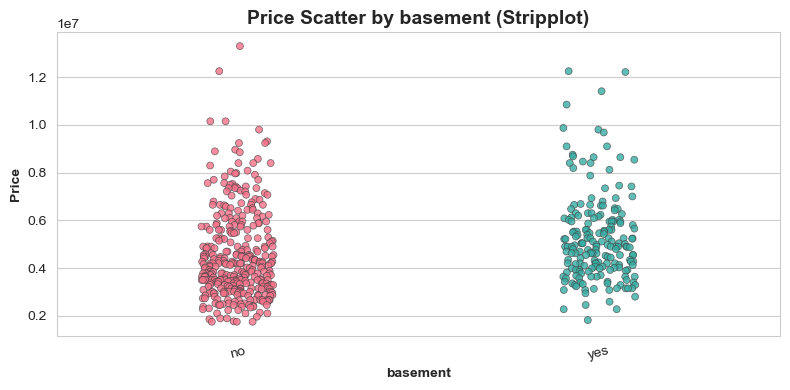

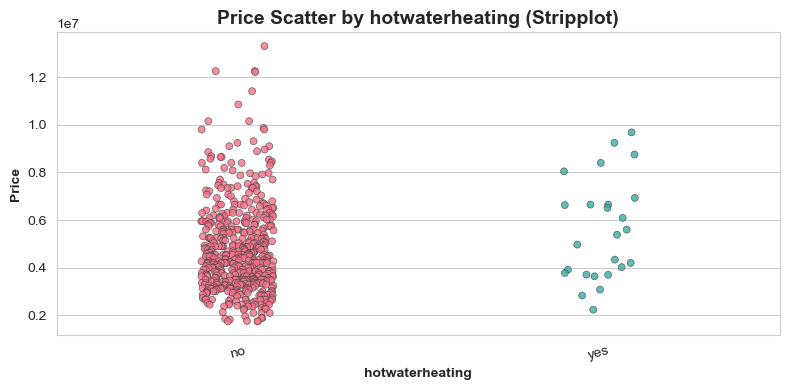

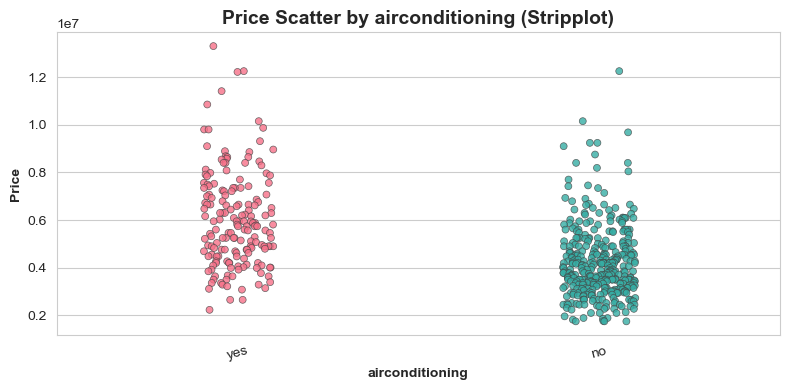

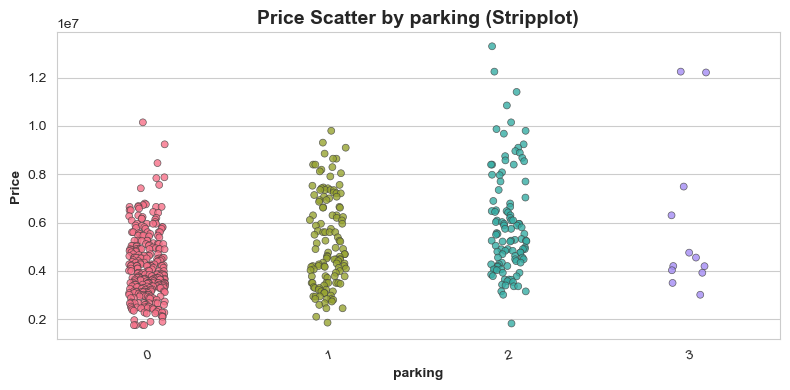

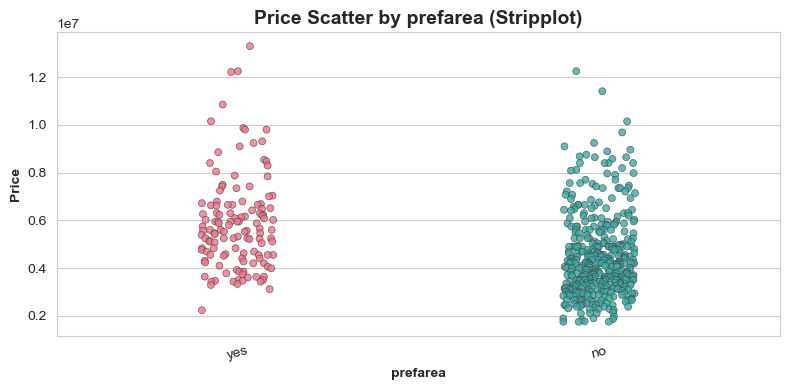

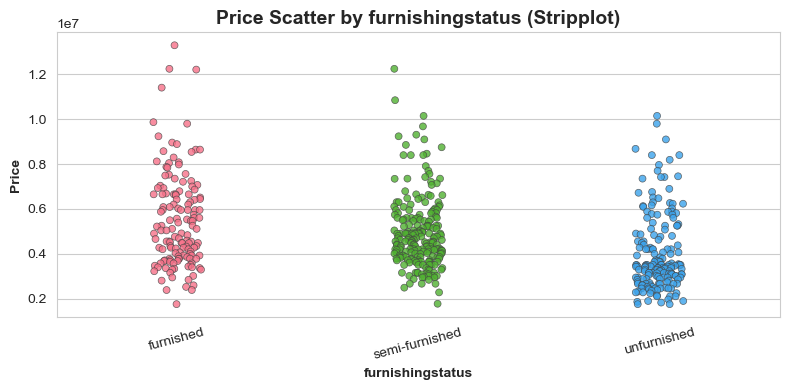

In [62]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.stripplot(
        x=col, y='price', data=df, 
        jitter=True, alpha=0.8, palette='husl', edgecolor='gray', linewidth=0.5
    )
    plt.title(f'Price Scatter by {col} (Stripplot)', fontsize=14, weight='bold')
    plt.xlabel(col, weight='bold')
    plt.ylabel('Price', weight='bold')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


In [64]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [66]:
print(df.isnull().sum())


area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking               0
prefarea              0
furnishingstatus      0
Unnamed: 12         545
owner_name            0
price                 0
dtype: int64


In [68]:
# Example: Fill numeric nulls with median (if needed)
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['area', 'price']] = scaler.fit_transform(df[['area', 'price']])


In [72]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# 1️⃣ Handle missing values (replace NaN with the mean of each column)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = y_train  # Usually y doesn't need imputation, but you can check if it has NaN

# 2️⃣ Train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train_imputed)

# 3️⃣ If you also have X_test:
# X_test_imputed = imputer.transform(X_test)
# predictions = model.predict(X_test_imputed)


LinearRegression()

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values